# <b><span style='color:#F1A424'>AutoML - Regression - House Price Prediction </span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    


The housing price dataset contains range of features associated with residential properties, including their physical attributes, amenities, and location-related characteristics. It is a common type of dataset used for regression or predictive modeling tasks in the field of real estate or housing market analysis. 

Here are some key details about the Housing dataset:

**Features**:

- `sn`: Serial number or identifier for each housing entry.
- `lotsize`: The size of the lot or land associated with the property, typically measured in square feet.
- `bedrooms`: The number of bedrooms in the house, indicating the sleeping spaces.
- `bathrms`: The number of bathrooms in the house, reflecting the sanitary facilities available.
- `stories`: The number of stories or levels in the house, indicating its vertical structure.
- `driveway`: A binary variable indicating the presence or absence of a driveway for vehicular access.
- `recroom`: A binary variable indicating whether the house has a recreation room.
- `fullbase`: A binary variable indicating the presence or absence of a full basement in the house.
- `gashw`: A binary variable indicating whether the house has a gas hot water heating system.
- `airco`: A binary variable indicating the presence or absence of air conditioning in the house.
- `garagepl`: The number of parking spaces available in the garage.
- `prefarea`: A binary variable indicating whether the house is located in a preferred or desirable area.
- `homestyle`: A categorical variable representing the style or type of the house.

**Target Variable**:

- `price`: The price of the house, representing the cost or value of the property.
        
**Objective**:

The main objective is typically to build a predictive model that can accurately predict prices of residential property based on various features. 

**Challenges**:

- Potential challenges in working with this dataset may include handling missing or skewed data.
- Managing categorical variables like 'homestyle' and addressing the complexities associated with predicting housing prices.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data("decisionforestpredict", ["housing_train", "housing_test"])

In [5]:
# Fetching in teradata dataframe
housing_train = DataFrame.from_table("housing_train")
housing_test = DataFrame.from_table("housing_test")

In [6]:
# Housing train dataset
housing_train.head()

sn,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,homestyle
3,49500.0,3060.0,3,1,1,yes,no,no,no,no,0,no,Classic
5,61000.0,6360.0,2,1,1,yes,no,no,no,no,0,no,Eclectic
6,66000.0,4160.0,3,1,1,yes,yes,yes,no,yes,0,no,Eclectic
7,66000.0,3880.0,3,2,2,yes,no,yes,no,no,2,no,Eclectic
9,83800.0,4800.0,3,1,1,yes,yes,yes,no,no,0,no,Eclectic
10,88500.0,5500.0,3,2,4,yes,yes,no,no,yes,1,no,Eclectic
8,69000.0,4160.0,3,1,3,yes,no,no,no,no,0,no,Eclectic
4,60500.0,6650.0,3,1,2,yes,yes,no,no,no,0,no,Eclectic
2,38500.0,4000.0,2,1,1,yes,no,no,no,no,0,no,Classic
1,42000.0,5850.0,3,1,2,yes,no,yes,no,no,1,no,Classic


In [7]:
# Housing train dataset shape
housing_train.shape

(492, 14)

In [8]:
# Housing test dataset
housing_test.head()

sn,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,homestyle
25,42000.0,4960.0,2,1,1,yes,no,no,no,no,0,no,Classic
53,68000.0,9166.0,2,1,1,yes,no,yes,no,yes,2,no,Eclectic
111,43000.0,5076.0,3,1,1,no,no,no,no,no,0,no,Classic
117,93000.0,3760.0,3,1,2,yes,no,no,yes,no,2,no,Eclectic
140,43000.0,3750.0,3,1,2,yes,no,no,no,no,0,no,Classic
142,40000.0,2650.0,3,1,2,yes,no,yes,no,no,1,no,Classic
132,44500.0,3850.0,3,1,2,yes,no,no,no,no,0,no,Classic
38,67000.0,5170.0,3,1,4,yes,no,no,no,yes,0,no,Eclectic
16,37900.0,3185.0,2,1,1,yes,no,no,no,yes,0,no,Classic
13,27000.0,1700.0,3,1,2,yes,no,no,no,no,0,no,Classic


In [9]:
# Housing test dataset shape
housing_test.shape

(46, 14)

## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [11]:
# Creating AutoML instance with task type 'Regression'
# Excluding knn from model training
# Keeping early stopping metrics threshold to 0.7 for 'R2', early stopping timer threshold to 200 sec
# and verbose level 2 for detailed loggging

aml = AutoML(task_type="Regression",
             exclude=['knn'],
             verbose=2,
             max_runtime_secs=200,
             stopping_metric='R2',
             stopping_tolerance=0.7)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 492
Total Columns in the data: 14

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
bedrooms,INTEGER,492,0,None,0,492,0,0.0,100.0
airco,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
price,FLOAT,492,0,None,0,492,0,0.0,100.0
lotsize,FLOAT,492,0,None,0,492,0,0.0,100.0
fullbase,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
prefarea,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
driveway,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
gashw,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
garagepl,INTEGER,492,0,None,270,222,0,0.0,100.0
homestyle,VARCHAR(20) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0



Statistics of Data:


func,sn,price,lotsize,bedrooms,bathrms,stories,garagepl
50%,274,62000,4616,3,1,2,0
count,492,492,492,492,492,492,492
mean,272.943,68100.396,5181.795,2.965,1.293,1.803,0.685
min,1,25000,1650,1,1,1,0
max,546,190000,16200,6,4,4,3
75%,413.25,82000,6370,3,2,2,1
25%,132.5,49975,3600,2,1,1,0
std,159.501,26472.496,2182.443,0.731,0.51,0.861,0.854



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
driveway                  2         
recroom                   2         
fullbase                  2         
gashw                     2         
airco                     2         
prefarea                  2         
homestyle                 3         

No Futile columns found.

Target Column Distribution:


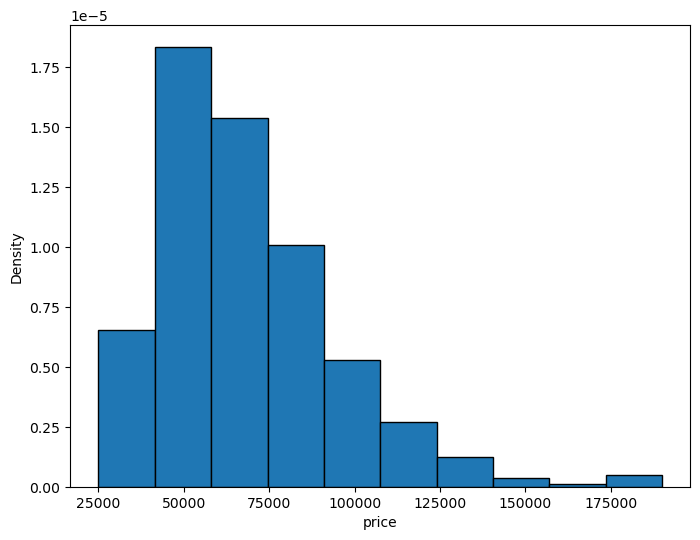

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    stories           7.113821
1    bathrms           0.203252
2   bedrooms           2.235772
3   garagepl           2.235772
4    lotsize           2.235772
5      price           2.439024


Analysis completed. No action taken.                                                    


Analysis indicates all categorical columns are significant. No action Needed.           


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719266311090947"' - 5/18


['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea', 'homestyle']


sn,price,lotsize,bedrooms,bathrms,stories,driveway_0,driveway_1,recroom_0,recroom_1,fullbase_0,fullbase_1,gashw_0,gashw_1,airco_0,airco_1,garagepl,prefarea_0,prefarea_1,homestyle_0,homestyle_1,homestyle_2,id
284,45000.0,6750.0,2,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,25
404,80000.0,6360.0,3,1,3,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,1,41
261,41000.0,5400.0,4,1,2,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,49
34,51500.0,4500.0,2,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,57
156,60000.0,2610.0,4,3,2,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,73
482,95000.0,5700.0,3,1,1,0,1,0,1,0,1,1,0,0,1,2,0,1,0,0,1,81
299,52900.0,5450.0,2,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,65
17,40500.0,3300.0,3,1,2,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,33
101,57000.0,4500.0,3,2,2,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,17
265,50000.0,3640.0,2,1,1,0,1,1,0,1,0,1,0,1,0,1,1,0,0,1,0,9


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


sn,price,lotsize,bedrooms,bathrms,stories,driveway_0,driveway_1,recroom_0,recroom_1,fullbase_0,fullbase_1,gashw_0,gashw_1,airco_0,airco_1,garagepl,prefarea_0,prefarea_1,homestyle_0,homestyle_1,homestyle_2,id
265,50000.0,3640.0,2,1,1,0,1,1,0,1,0,1,0,1,0,1,1,0,0,1,0,9
40,54500.0,3150.0,2,2,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,10
120,116000.0,6840.0,5,1,2,0,1,0,1,0,1,1,0,0,1,1,1,0,1,0,0,18
326,99000.0,8880.0,3,2,2,0,1,1,0,0,1,1,0,0,1,1,1,0,0,0,1,13
80,63900.0,6360.0,2,1,1,0,1,1,0,0,1,1,0,0,1,1,1,0,0,0,1,12
345,88000.0,4500.0,3,1,4,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,1,20
122,80000.0,10500.0,4,2,2,0,1,1,0,1,0,1,0,1,0,1,1,0,0,0,1,11
387,83900.0,11460.0,3,1,3,0,1,1,0,1,0,1,0,1,0,2,0,1,0,0,1,19
427,49500.0,5320.0,2,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,15
223,70100.0,4200.0,3,1,2,0,1,1,0,1,0,1,0,1,0,1,1,0,0,0,1,23


sn,price,lotsize,bedrooms,bathrms,stories,driveway_0,driveway_1,recroom_0,recroom_1,fullbase_0,fullbase_1,gashw_0,gashw_1,airco_0,airco_1,garagepl,prefarea_0,prefarea_1,homestyle_0,homestyle_1,homestyle_2,id
200,52000.0,3570.0,3,1,2,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,26
385,78000.0,6600.0,4,2,2,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,1,29
112,46500.0,4500.0,2,1,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,125
366,99000.0,13200.0,2,1,1,0,1,1,0,0,1,0,1,1,0,1,1,0,0,0,1,24
242,52000.0,3000.0,2,1,2,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,1,28
379,84000.0,7160.0,3,1,1,0,1,1,0,0,1,1,0,1,0,2,0,1,0,0,1,124
284,45000.0,6750.0,2,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,25
354,86000.0,6800.0,2,1,1,0,1,0,1,0,1,1,0,1,0,2,1,0,0,0,1,121
488,44100.0,8100.0,2,1,1,0,1,1,0,1,0,1,0,1,0,1,1,0,0,1,0,30
154,42000.0,3600.0,3,1,2,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,126


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    lotsize           2.235772
1   bedrooms           2.235772
2   garagepl           2.235772
3    stories           7.113821
4      price           2.439024
5    bathrms           0.203252


['price', 'bathrms', 'garagepl', 'bedrooms', 'lotsize', 'stories']
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719263340240232"' - 7/18


sn,price,lotsize,bedrooms,bathrms,stories,driveway_0,driveway_1,recroom_0,recroom_1,fullbase_0,fullbase_1,gashw_0,gashw_1,airco_0,airco_1,garagepl,prefarea_0,prefarea_1,homestyle_0,homestyle_1,homestyle_2,id
404,80000.0,6360.0,3,1,3,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,1,41
337,106000.0,7440.0,3,2,1,0,1,0,1,0,1,1,0,0,1,0,0,1,1,0,0,97
9,83800.0,4800.0,3,1,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,105
352,68500.0,7000.0,3,1,2,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,161
64,54000.0,4820.0,3,1,2,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,193
81,50000.0,4240.0,3,1,2,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,217
514,66000.0,5010.0,3,1,2,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,169
482,95000.0,5700.0,3,1,1,0,1,0,1,0,1,1,0,0,1,2,0,1,0,0,1,81
17,40500.0,3300.0,3,1,2,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,33
101,57000.0,4500.0,3,2,2,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,17


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261948305803"' - 8/18
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260470969990"'


['homestyle_0', 'driveway_1', 'prefarea_1', 'stories', 'recroom_0', 'airco_1', 'prefarea_0', 'sn', 'garagepl', 'bathrms', 'fullbase_0', 'recroom_1', 'homestyle_1', 'fullbase_1', 'driveway_0', 'airco_0', 'lotsize']


['stories', 'sn', 'garagepl', 'bathrms', 'lotsize']


airco_1,prefarea_0,price,airco_0,homestyle_0,driveway_1,id,prefarea_1,fullbase_0,recroom_1,homestyle_1,fullbase_1,driveway_0,recroom_0,stories,sn,garagepl,bathrms,lotsize
1,1,87000.0,0,0,1,16,0,1,0,0,0,0,1,1.8337296639558505,1.459263077324231,1.8067578676948282,-0.5026028286234502,1.7653699726936964
0,1,60000.0,1,0,1,21,0,1,0,0,0,0,1,-1.1754677333050323,0.1491173795147715,1.8067578676948282,-0.5026028286234502,0.425893695347426
0,1,70100.0,1,0,1,23,0,1,0,0,0,0,1,0.32913096532540903,-0.377509812741972,0.521952272889617,-0.5026028286234502,-0.4073730401712492
0,1,46000.0,1,0,0,32,0,1,0,1,0,1,1,0.32913096532540903,-0.3903543784067706,-0.7628533219155941,-0.5026028286234502,-0.9698280866463549
0,1,25245.0,1,0,0,34,0,1,0,1,0,1,1,-1.1754677333050323,-1.4436087629202576,-0.7628533219155941,-0.5026028286234502,-1.3447981176297588
0,1,56000.0,1,0,1,38,0,1,0,0,0,0,1,0.32913096532540903,-0.9041370049987155,-0.7628533219155941,-0.5026028286234502,-1.0323230918102555
0,1,40500.0,1,0,0,33,0,1,0,1,0,1,1,0.32913096532540903,-1.7005000762162301,0.521952272889617,-0.5026028286234502,-0.876085578900504
1,1,57000.0,0,0,0,17,0,0,0,0,1,1,1,0.32913096532540903,-1.1610283182946879,-0.7628533219155941,1.6905731508243318,-0.25113552726149757
1,1,99000.0,0,0,1,13,0,0,0,0,1,0,1,0.32913096532540903,0.28398531899515705,0.521952272889617,1.6905731508243318,2.029932161220876
0,1,58000.0,1,0,1,8,0,1,0,0,0,0,1,-1.1754677333050323,-0.6344011260379444,-0.7628533219155941,-0.5026028286234502,-0.3344622008133651


airco_1,prefarea_0,price,airco_0,homestyle_0,driveway_1,id,prefarea_1,fullbase_0,recroom_1,homestyle_1,fullbase_1,driveway_0,recroom_0,stories,sn,garagepl,bathrms,lotsize
1,0,120000.0,0,1,1,27,1,0,0,0,1,0,1,0.32913096532540903,1.067503824547873,0.521952272889617,1.6905731508243318,0.2696561824376744
1,1,120000.0,0,1,1,417,0,1,0,0,0,0,1,3.338328362586292,1.6069755824694152,1.8067578676948282,-0.5026028286234502,1.0508437469864325
0,1,95000.0,1,0,1,480,0,1,0,0,0,0,1,0.32913096532540903,-1.000471247484705,-0.7628533219155941,1.6905731508243318,-0.37612553758929884
0,1,120000.0,1,1,1,425,0,0,0,0,1,0,1,0.32913096532540903,0.5537211979559281,1.8067578676948282,1.6905731508243318,1.5455958712006457
1,0,133000.0,0,1,1,455,1,1,0,0,0,0,1,0.32913096532540903,0.6050994606151225,0.521952272889617,1.6905731508243318,0.816487477621805
1,1,52000.0,0,0,1,28,0,1,0,0,0,0,1,0.32913096532540903,-0.25548643892638506,-0.7628533219155941,-0.5026028286234502,-1.0323230918102555
0,1,28000.0,1,0,0,520,0,1,0,1,0,1,1,0.32913096532540903,-0.6215565603731458,-0.7628533219155941,-0.5026028286234502,-0.8135905737366034
0,1,48000.0,1,0,0,448,0,0,0,1,1,1,1,0.32913096532540903,-0.7178908028591355,-0.7628533219155941,-0.5026028286234502,-0.9802439208403384
0,1,61000.0,1,0,1,208,0,1,0,0,0,0,1,-1.1754677333050323,-1.7775674702050217,-0.7628533219155941,-0.5026028286234502,0.7175370527789623
1,1,103000.0,0,1,1,368,0,1,1,0,0,0,0,3.338328362586292,1.5363304713130226,0.521952272889617,1.6905731508243318,1.4049821095818693


['homestyle_0', 'stories', 'airco_1', 'homestyle_2', 'sn', 'garagepl', 'bathrms', 'homestyle_1', 'lotsize']


['r_stories', 'r_sn', 'r_garagepl', 'r_bathrms', 'r_lotsize']


r_homestyle_0,price,r_homestyle_1,id,r_homestyle_2,r_airco_1,r_stories,r_sn,r_garagepl,r_bathrms,r_lotsize
0,87000.0,0,16,1,1,1.8337296639558505,1.459263077324231,1.8067578676948282,-0.5026028286234502,1.7653699726936964
0,60000.0,0,21,1,0,-1.1754677333050323,0.1491173795147715,1.8067578676948282,-0.5026028286234502,0.425893695347426
0,70100.0,0,23,1,0,0.32913096532540903,-0.377509812741972,0.521952272889617,-0.5026028286234502,-0.4073730401712492
0,46000.0,1,32,0,0,0.32913096532540903,-0.3903543784067706,-0.7628533219155941,-0.5026028286234502,-0.9698280866463549
0,25245.0,1,34,0,0,-1.1754677333050323,-1.4436087629202576,-0.7628533219155941,-0.5026028286234502,-1.3447981176297588
0,56000.0,0,38,1,0,0.32913096532540903,-0.9041370049987155,-0.7628533219155941,-0.5026028286234502,-1.0323230918102555
0,40500.0,1,33,0,0,0.32913096532540903,-1.7005000762162301,0.521952272889617,-0.5026028286234502,-0.876085578900504
0,57000.0,0,17,1,1,0.32913096532540903,-1.1610283182946879,-0.7628533219155941,1.6905731508243318,-0.25113552726149757
0,99000.0,0,13,1,1,0.32913096532540903,0.28398531899515705,0.521952272889617,1.6905731508243318,2.029932161220876
0,58000.0,0,8,1,0,-1.1754677333050323,-0.6344011260379444,-0.7628533219155941,-0.5026028286234502,-0.3344622008133651


r_homestyle_0,price,r_homestyle_1,id,r_homestyle_2,r_airco_1,r_stories,r_sn,r_garagepl,r_bathrms,r_lotsize
1,120000.0,0,27,0,1,0.32913096532540903,1.067503824547873,0.521952272889617,1.6905731508243318,0.2696561824376744
1,120000.0,0,417,0,1,3.338328362586292,1.6069755824694152,1.8067578676948282,-0.5026028286234502,1.0508437469864325
0,95000.0,0,480,1,0,0.32913096532540903,-1.000471247484705,-0.7628533219155941,1.6905731508243318,-0.37612553758929884
1,120000.0,0,425,0,0,0.32913096532540903,0.5537211979559281,1.8067578676948282,1.6905731508243318,1.5455958712006457
1,133000.0,0,455,0,1,0.32913096532540903,0.6050994606151225,0.521952272889617,1.6905731508243318,0.816487477621805
0,52000.0,0,28,1,1,0.32913096532540903,-0.25548643892638506,-0.7628533219155941,-0.5026028286234502,-1.0323230918102555
0,28000.0,1,520,0,0,0.32913096532540903,-0.6215565603731458,-0.7628533219155941,-0.5026028286234502,-0.8135905737366034
0,48000.0,1,448,0,0,0.32913096532540903,-0.7178908028591355,-0.7628533219155941,-0.5026028286234502,-0.9802439208403384
0,61000.0,0,208,1,0,-1.1754677333050323,-1.7775674702050217,-0.7628533219155941,-0.5026028286234502,0.7175370527789623
1,103000.0,0,368,0,1,3.338328362586292,1.5363304713130226,0.521952272889617,1.6905731508243318,1.4049821095818693


['sn', 'lotsize', 'bathrms', 'stories', 'garagepl']


airco_1,homestyle_2,prefarea_0,price,airco_0,gashw_0,homestyle_0,bedrooms,gashw_1,driveway_1,id,prefarea_1,fullbase_0,recroom_1,homestyle_1,fullbase_1,driveway_0,recroom_0,sn,lotsize,bathrms,stories,garagepl
0,0,1,35500.0,1,1,0,3,0,1,51,0,1,0,1,0,0,1,-1.4307641972554586,-0.3032146982314151,-0.5026028286234494,0.32913096532540864,-0.7628533219155942
1,1,1,99000.0,0,1,0,3,0,1,13,0,0,0,0,1,0,1,0.28398531899515694,2.029932161220878,1.690573150824329,0.32913096532540864,0.5219522728896171
0,1,1,60000.0,1,0,0,3,1,1,21,0,1,0,0,0,0,1,0.14911737951477144,0.42589369534742644,-0.5026028286234494,-1.175467733305031,1.8067578676948284
1,1,1,57000.0,0,1,0,3,0,0,17,0,0,0,0,1,1,1,-1.1610283182946874,-0.25113552726149785,1.690573150824329,0.32913096532540864,-0.7628533219155942
0,1,1,70100.0,1,1,0,3,0,1,23,0,1,0,0,0,0,1,-0.3775098127419719,-0.40737304017124965,-0.5026028286234494,0.32913096532540864,0.5219522728896171
1,1,1,88500.0,0,1,0,3,0,1,71,0,1,1,0,0,0,0,0.2582961876655597,0.7123291356819713,1.690573150824329,1.8337296639558482,-0.7628533219155942
0,1,1,58000.0,1,1,0,3,0,1,8,0,1,0,0,0,0,1,-0.6344011260379442,-0.3344622008133655,-0.5026028286234494,-1.175467733305031,-0.7628533219155942
1,1,1,87000.0,0,1,0,3,0,1,16,0,1,0,0,0,0,1,1.4592630773242303,1.7653699726936982,-0.5026028286234494,1.8337296639558482,1.8067578676948284
0,1,0,65500.0,1,1,0,3,0,1,44,1,1,0,0,0,0,1,0.9197913194026884,-0.5948580556629517,-0.5026028286234494,0.32913096532540864,0.5219522728896171
1,1,1,94500.0,0,1,0,3,0,1,52,0,0,0,0,1,0,1,-1.0518495101438992,-0.5115313821110842,1.690573150824329,0.32913096532540864,0.5219522728896171


airco_1,homestyle_2,prefarea_0,price,airco_0,gashw_0,homestyle_0,bedrooms,gashw_1,driveway_1,id,prefarea_1,fullbase_0,recroom_1,homestyle_1,fullbase_1,driveway_0,recroom_0,sn,lotsize,bathrms,stories,garagepl
0,0,1,45000.0,1,1,0,2,0,1,25,0,1,0,1,0,0,1,0.014249440034385967,0.9206458195616404,-0.5026028286234494,-1.175467733305031,-0.7628533219155942
1,0,0,120000.0,0,1,1,4,0,1,27,1,0,0,0,1,0,1,1.0675038245478725,0.2696561824376747,1.690573150824329,0.32913096532540864,0.5219522728896171
0,0,1,47000.0,1,1,0,3,0,1,123,0,0,1,1,1,0,0,-1.2252511466186806,0.5612995398692113,-0.5026028286234494,-1.175467733305031,-0.7628533219155942
0,1,0,78000.0,1,1,0,4,0,1,29,1,0,1,0,1,0,0,0.6629000061067162,0.8425270631067645,1.690573150824329,0.32913096532540864,-0.7628533219155942
0,1,1,52000.0,1,1,0,3,0,1,26,0,0,0,0,1,0,1,-0.525222317887156,-0.7354718172817283,-0.5026028286234494,0.32913096532540864,-0.7628533219155942
0,0,1,47900.0,1,1,0,3,0,0,122,0,1,0,1,0,1,1,-0.44173264106596494,-1.1885606047200084,-0.5026028286234494,-1.175467733305031,-0.7628533219155942
1,1,1,52000.0,0,1,0,2,0,1,28,0,1,0,0,0,0,1,-0.255486438926385,-1.0323230918102566,-0.5026028286234494,0.32913096532540864,-0.7628533219155942
0,1,0,84000.0,1,1,0,3,0,1,124,1,0,0,0,1,0,1,0.6243663091123203,1.1341704205383012,-0.5026028286234494,-1.175467733305031,1.8067578676948284
0,0,1,44100.0,1,1,0,2,0,1,30,0,1,0,1,0,0,1,1.324395137843845,1.6237146276555232,-0.5026028286234494,-1.175467733305031,0.5219522728896171
0,0,1,42000.0,1,1,0,3,0,0,126,0,1,0,1,0,1,1,-0.8206473281775242,-0.7198480659907531,-0.5026028286234494,0.32913096532540864,0.5219522728896171


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9']


response_column : price                                                                                                                               
name : xgboost
model_type : Regression
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2, 0.3)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.01, 0.05, 0.1)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
iter_num : (10, 20, 30, 40)
seed : 42
Total number of models for xgboost : 10240
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : price
name : decision_forest
tree_type : Regression
min_impurity : (0.0, 0.1, 0.2, 0.3)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
num_trees : (-1, 20, 30, 40)
seed : 42
Total number of models for decision_forest : 320
-------------------------------------------------------------------------------------

result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719268472074909"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260704378501"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261227634524"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260572358199"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719267144026665"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260453979843"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261733187223"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261214449474"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260235501260"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261672357179"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260911456836"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265217269577"'


,Rank,Model-ID,Feature-Selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,XGBOOST_1,rfe,9127.948617,1.486578e+08,0.030849,12192.530872,0.175639,0.783428,0.761528
1,2,XGBOOST_0,lasso,9574.909963,1.584132e+08,0.035347,12586.230733,0.188007,0.769216,0.720780
2,3,XGBOOST_3,lasso,9574.909963,1.584132e+08,0.035347,12586.230733,0.188007,0.769216,0.720780
3,4,DECISIONFOREST_1,rfe,10385.640654,1.831875e+08,0.038641,13534.678112,0.196573,0.733124,0.706136
4,5,DECISIONFOREST_0,lasso,10414.933583,1.840673e+08,0.039091,13567.140803,0.197714,0.731842,0.675562
5,6,GLM_3,lasso,11392.095976,2.048004e+08,0.045215,14310.847929,0.212638,0.701637,0.639018
6,7,DECISIONFOREST_2,pca,14363.566413,3.541154e+08,0.076767,18817.952960,0.277068,0.484108,0.425484
7,8,DECISIONFOREST_3,lasso,13897.954545,4.206409e+08,0.068350,20509.531042,0.261439,0.387190,0.258576
8,9,XGBOOST_2,pca,15141.142326,4.300860e+08,0.088646,20738.514782,0.297736,0.373430,0.302229
9,10,GLM_0,lasso,17724.421625,5.072995e+08,0.366794,22523.310759,0.605635,0.260942,0.105831


In [12]:
# Fitting train data
aml.fit(housing_train,housing_train.price)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [13]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Model-ID,Feature-Selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,XGBOOST_1,rfe,9127.948617,1.486578e+08,0.030849,12192.530872,0.175639,0.783428,0.761528
1,2,XGBOOST_0,lasso,9574.909963,1.584132e+08,0.035347,12586.230733,0.188007,0.769216,0.720780
2,3,XGBOOST_3,lasso,9574.909963,1.584132e+08,0.035347,12586.230733,0.188007,0.769216,0.720780
3,4,DECISIONFOREST_1,rfe,10385.640654,1.831875e+08,0.038641,13534.678112,0.196573,0.733124,0.706136
4,5,DECISIONFOREST_0,lasso,10414.933583,1.840673e+08,0.039091,13567.140803,0.197714,0.731842,0.675562
5,6,GLM_3,lasso,11392.095976,2.048004e+08,0.045215,14310.847929,0.212638,0.701637,0.639018
6,7,DECISIONFOREST_2,pca,14363.566413,3.541154e+08,0.076767,18817.952960,0.277068,0.484108,0.425484
7,8,DECISIONFOREST_3,lasso,13897.954545,4.206409e+08,0.068350,20509.531042,0.261439,0.387190,0.258576
8,9,XGBOOST_2,pca,15141.142326,4.300860e+08,0.088646,20738.514782,0.297736,0.373430,0.302229
9,10,GLM_0,lasso,17724.421625,5.072995e+08,0.366794,22523.310759,0.605635,0.260942,0.105831


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [14]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Model-ID,Feature-Selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,XGBOOST_1,rfe,9127.948617,1.486578e+08,0.030849,12192.530872,0.175639,0.783428,0.761528


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

In [19]:
# Generating prediction and metrics on test data
prediction = aml.predict(housing_test)

Data Transformation started ...


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262330882434"'⫾⫾⫾｜ 50% - 5/10


sn,price,lotsize,bedrooms,bathrms,stories,driveway_0,driveway_1,recroom_0,recroom_1,fullbase_0,fullbase_1,gashw_0,gashw_1,airco_0,airco_1,garagepl,prefarea_0,prefarea_1,homestyle_0,homestyle_1,homestyle_2,id
251,48500.0,3450.0,3,1,1,0,1,1,0,0,1,1,0,1,0,2,1,0,0,1,0,14
469,55000.0,2176.0,2,1,2,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,1,8
364,72000.0,10700.0,3,1,2,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,16
260,41000.0,6000.0,2,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,10
255,61000.0,4360.0,4,1,2,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,15
16,37900.0,3185.0,2,1,1,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,23
463,49000.0,2610.0,3,1,2,0,1,1,0,0,1,1,0,1,0,0,0,1,0,1,0,13
459,44555.0,2398.0,3,1,1,0,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0,21
301,55000.0,4080.0,2,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,9
13,27000.0,1700.0,3,1,2,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,17


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719266545839810"'⫾⫾⫾｜ 60% - 6/10


id,homestyle_0,driveway_1,prefarea_1,stories,recroom_0,airco_1,prefarea_0,sn,garagepl,bathrms,fullbase_0,recroom_1,homestyle_1,fullbase_1,driveway_0,airco_0,lotsize,price
48,0,1,0,1,1,0,1,25,0,1,1,0,1,0,0,1,4960.0,42000.0
26,0,1,0,2,1,0,1,355,0,2,1,0,0,0,0,1,4300.0,86900.0
13,0,1,1,2,1,0,0,463,0,1,0,0,1,1,0,1,2610.0,49000.0
21,0,1,1,1,1,0,0,459,0,1,1,0,1,0,0,1,2398.0,44555.0
37,0,1,0,2,1,0,1,117,2,1,1,0,0,0,0,1,3760.0,93000.0
45,0,1,0,2,1,0,1,340,0,1,1,0,0,0,0,1,3900.0,62500.0
29,0,1,0,1,1,1,1,306,1,1,1,0,0,0,0,0,5885.0,64000.0
10,0,1,0,1,1,0,1,260,0,1,1,0,1,0,0,1,6000.0,41000.0
40,0,1,1,1,0,1,0,401,2,1,0,1,0,1,0,0,7410.0,92500.0
24,0,1,0,1,0,0,1,274,0,2,0,1,0,1,0,1,4100.0,64900.0


airco_1,prefarea_0,price,airco_0,homestyle_0,driveway_1,id,prefarea_1,fullbase_0,recroom_1,homestyle_1,fullbase_1,driveway_0,recroom_0,stories,sn,garagepl,bathrms,lotsize
0,1,42000.0,1,0,1,48,0,1,0,1,0,0,1,-1.1754677333050323,-1.6491218135570356,-0.7628533219155941,-0.5026028286234502,-0.011571340799878477
0,1,86900.0,1,0,1,26,0,1,0,0,0,0,1,0.32913096532540903,0.47023152113473704,-0.7628533219155941,1.6905731508243318,-0.355293869201332
0,0,49000.0,1,0,1,13,1,0,0,1,1,0,1,0.32913096532540903,1.1638380670338626,-0.7628533219155941,-0.5026028286234502,-1.2354318585929327
0,0,44555.0,1,0,1,21,1,1,0,1,0,0,1,-1.1754677333050323,1.1381489357042653,-0.7628533219155941,-0.5026028286234502,-1.3458397010491572
0,1,93000.0,1,0,1,37,0,1,0,0,0,0,1,0.32913096532540903,-1.058271792976299,1.8067578676948282,-0.5026028286234502,-0.6365213924388848
0,1,62500.0,1,0,1,45,0,1,0,0,0,0,1,0.32913096532540903,0.3738972786487474,-0.7628533219155941,-0.5026028286234502,-0.5636105530810008
1,1,64000.0,0,0,1,29,0,1,0,0,0,0,1,-1.1754677333050323,0.15553966234717082,0.521952272889617,-0.5026028286234502,0.4701609906718556
0,1,41000.0,1,0,1,10,0,1,0,1,0,0,1,-1.1754677333050323,-0.13988534794319749,-0.7628533219155941,-0.5026028286234502,0.5300520372872604
1,0,92500.0,0,0,1,40,1,0,1,0,1,0,0,-1.1754677333050323,0.7656565314251054,1.8067578676948282,-0.5026028286234502,1.264368347963093
0,1,64900.0,1,0,1,24,0,0,1,0,1,0,0,-1.1754677333050323,-0.04997338828960714,-0.7628533219155941,1.6905731508243318,-0.4594522111411664


id,homestyle_0,stories,airco_1,homestyle_2,sn,garagepl,bathrms,homestyle_1,lotsize,price
48,0,1,0,0,25,0,1,1,4960.0,42000.0
26,0,2,0,1,355,0,2,0,4300.0,86900.0
13,0,2,0,0,463,0,1,1,2610.0,49000.0
21,0,1,0,0,459,0,1,1,2398.0,44555.0
37,0,2,0,1,117,2,1,0,3760.0,93000.0
45,0,2,0,1,340,0,1,0,3900.0,62500.0
29,0,1,1,1,306,1,1,0,5885.0,64000.0
10,0,1,0,0,260,0,1,1,6000.0,41000.0
40,0,1,1,1,401,2,1,0,7410.0,92500.0
24,0,1,0,1,274,0,2,0,4100.0,64900.0


r_homestyle_0,price,r_homestyle_1,id,r_homestyle_2,r_airco_1,r_stories,r_sn,r_garagepl,r_bathrms,r_lotsize
0,42000.0,1,48,0,0,-1.1754677333050323,-1.6491218135570356,-0.7628533219155941,-0.5026028286234502,-0.011571340799878477
0,86900.0,0,26,1,0,0.32913096532540903,0.47023152113473704,-0.7628533219155941,1.6905731508243318,-0.355293869201332
0,49000.0,1,13,0,0,0.32913096532540903,1.1638380670338626,-0.7628533219155941,-0.5026028286234502,-1.2354318585929327
0,44555.0,1,21,0,0,-1.1754677333050323,1.1381489357042653,-0.7628533219155941,-0.5026028286234502,-1.3458397010491572
0,93000.0,0,37,1,0,0.32913096532540903,-1.058271792976299,1.8067578676948282,-0.5026028286234502,-0.6365213924388848
0,62500.0,0,45,1,0,0.32913096532540903,0.3738972786487474,-0.7628533219155941,-0.5026028286234502,-0.5636105530810008
0,64000.0,0,29,1,1,-1.1754677333050323,0.15553966234717082,0.521952272889617,-0.5026028286234502,0.4701609906718556
0,41000.0,1,10,0,0,-1.1754677333050323,-0.13988534794319749,-0.7628533219155941,-0.5026028286234502,0.5300520372872604
0,92500.0,0,40,1,1,-1.1754677333050323,0.7656565314251054,1.8067578676948282,-0.5026028286234502,1.264368347963093
0,64900.0,0,24,1,0,-1.1754677333050323,-0.04997338828960714,-0.7628533219155941,1.6905731508243318,-0.4594522111411664


airco_1,homestyle_2,prefarea_0,price,airco_0,gashw_0,homestyle_0,bedrooms,gashw_1,driveway_1,id,prefarea_1,fullbase_0,recroom_1,homestyle_1,fullbase_1,driveway_0,recroom_0,sn,lotsize,bathrms,stories,garagepl
0,0,1,42000.0,1,1,0,2,0,1,48,0,1,0,1,0,0,1,-1.649121813557035,-0.01157134079987849,-0.5026028286234494,-1.175467733305031,-0.7628533219155942
0,1,1,86900.0,1,1,0,6,0,1,26,0,1,0,0,0,0,1,0.4702315211347369,-0.3552938692013324,1.690573150824329,0.32913096532540864,-0.7628533219155942
0,0,0,49000.0,1,1,0,3,0,1,13,1,0,0,1,1,0,1,1.1638380670338622,-1.235431858592934,-0.5026028286234494,0.32913096532540864,-0.7628533219155942
0,0,0,44555.0,1,1,0,3,0,1,21,1,1,0,1,0,0,1,1.138148935704265,-1.3458397010491585,-0.5026028286234494,-1.175467733305031,-0.7628533219155942
0,1,1,93000.0,1,0,0,3,1,1,37,0,1,0,0,0,0,1,-1.0582717929762986,-0.6365213924388855,-0.5026028286234494,0.32913096532540864,1.8067578676948284
0,1,1,62500.0,1,1,0,3,0,1,45,0,1,0,0,0,0,1,0.3738972786487472,-0.5636105530810014,-0.5026028286234494,0.32913096532540864,-0.7628533219155942
1,1,1,64000.0,0,1,0,2,0,1,29,0,1,0,0,0,0,1,0.15553966234717076,0.4701609906718561,-0.5026028286234494,-1.175467733305031,0.5219522728896171
0,0,1,41000.0,1,1,0,2,0,1,10,0,1,0,1,0,0,1,-0.13988534794319743,0.5300520372872609,-0.5026028286234494,-1.175467733305031,-0.7628533219155942
1,1,0,92500.0,0,1,0,3,0,1,40,1,0,1,0,1,0,0,0.765656531425105,1.2643683479630943,-0.5026028286234494,-1.175467733305031,1.8067578676948284
0,1,1,64900.0,1,1,0,2,0,1,24,0,0,1,0,1,0,0,-0.049973388289607124,-0.45945221114116686,1.690573150824329,-1.175467733305031,-0.7628533219155942


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,price
0,24,0.121058,-0.088188,1.823276,-1.499059,0.807124,-0.001108,-0.486189,-0.327831,0.999693,0.041307,64900.0
1,40,2.732152,-1.196533,-0.243570,-0.130603,0.061535,0.992846,0.669891,0.796020,0.182694,0.034230,92500.0
2,48,-1.466384,-1.594199,0.440659,-0.192916,-0.727838,-0.698315,-0.370444,0.078220,-0.266739,-0.400643,42000.0
3,10,-0.433849,-1.132748,-0.239012,-0.552218,-0.744052,-1.251285,-0.337724,-0.066861,0.077437,-0.506742,41000.0
4,26,-0.218655,1.292727,0.887027,-0.166690,0.394173,-0.954230,-0.384842,-0.937871,0.398214,0.238445,86900.0
5,13,-0.562519,0.631340,-1.279058,-1.240724,1.337035,-0.266514,0.235935,0.432765,-0.466239,-0.833386,49000.0
6,21,-0.556103,-0.430944,-1.299009,-1.208186,1.167272,-1.350354,0.655622,0.022532,0.184275,-0.272029,44555.0
7,29,0.713664,-1.049937,-0.245372,0.286599,-0.760120,-0.026496,0.770101,-0.793006,0.435955,0.026876,64000.0
8,37,-0.390859,-0.785477,-0.041713,2.114031,0.680330,0.593279,-0.340019,-0.156157,0.060593,0.288505,93000.0
9,45,-0.781417,0.416129,-0.816974,-0.075853,-0.020223,-0.213575,-0.451554,-0.653641,0.461913,0.097843,62500.0


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being used for generating prediction :
Model ID : XGBOOST_1 
Feature Selection Method : rfe

Prediction : 
   id    Prediction  Confidence_Lower  Confidence_upper    price
0  48  45307.362252      45307.362252      45307.362252  42000.0
1  26  54905.403312      54905.403312      54905.403312  86900.0
2  13  48673.581428      48673.581428      48673.581428  49000.0
3  21  47402.820802      47402.820802      47402.820802  44555.0
4  37  66110.951130      66110.951130      66110.951130  93000.0
5  45  66636.058316      66636.058316      66636.058316  62500.0
6  29  69607.861771      69607.861771      69607.861771  64000.0
7  10  39422.819639      39422.819639      39422.819639  41000.0
8  40  83376.126160      83376.126160      83376.126160  92500.0
9  24  69480.485848      69480.485848      69480.485848  64900.0

Performance Metrics : 
           MAE           MSE      MS

In [20]:
# Printing prediction
prediction.head()

id,Prediction,Confidence_Lower,Confidence_upper,price
10,39422.819638999994,39422.819638999994,39422.819638999994,41000.0
12,60893.767418999996,60893.767418999996,60893.767418999996,67000.0
13,48673.581428,48673.581428,48673.581428,49000.0
14,38086.39137899999,38086.39137899999,38086.39137899999,48500.0
16,82819.145094,82819.145094,82819.145094,72000.0
17,35074.387801,35074.387801,35074.387801,27000.0
15,61383.306064,61383.306064,61383.306064,61000.0
11,58354.965065,58354.965065,58354.965065,68000.0
9,64868.785296999995,64868.785296999995,64868.785296999995,55000.0
8,55361.128054999994,55361.128054999994,55361.128054999994,55000.0


In [21]:
# Generating prediction and metrics on test data using rank 2 model
prediction = aml.predict(housing_test,2)

Data Transformation started ...


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261956275370"'⫾⫾⫾｜ 50% - 5/10


sn,price,lotsize,bedrooms,bathrms,stories,driveway_0,driveway_1,recroom_0,recroom_1,fullbase_0,fullbase_1,gashw_0,gashw_1,airco_0,airco_1,garagepl,prefarea_0,prefarea_1,homestyle_0,homestyle_1,homestyle_2,id
301,55000.0,4080.0,2,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,9
469,55000.0,2176.0,2,1,2,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,1,8
364,72000.0,10700.0,3,1,2,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,16
463,49000.0,2610.0,3,1,2,0,1,1,0,0,1,1,0,1,0,0,0,1,0,1,0,13
53,68000.0,9166.0,2,1,1,0,1,1,0,0,1,1,0,0,1,2,1,0,0,0,1,11
440,69000.0,6862.0,3,1,2,0,1,1,0,1,0,1,0,0,1,2,0,1,0,0,1,19
260,41000.0,6000.0,2,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,10
540,85000.0,7320.0,4,2,2,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,18
251,48500.0,3450.0,3,1,1,0,1,1,0,0,1,1,0,1,0,2,1,0,0,1,0,14
408,87500.0,6420.0,3,1,3,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,1,22


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265718796844"'⫾⫾⫾｜ 60% - 6/10


id,homestyle_0,driveway_1,prefarea_1,stories,recroom_0,airco_1,prefarea_0,sn,garagepl,bathrms,fullbase_0,recroom_1,homestyle_1,fullbase_1,driveway_0,airco_0,lotsize,price
52,0,0,0,1,1,0,1,111,0,1,1,0,1,0,1,1,5076.0,43000.0
24,0,1,0,1,0,0,1,274,0,2,0,1,0,1,0,1,4100.0,64900.0
32,0,1,1,1,0,1,0,403,0,1,0,1,0,1,0,0,6825.0,77500.0
40,0,1,1,1,0,1,0,401,2,1,0,1,0,1,0,0,7410.0,92500.0
9,0,1,0,1,1,0,1,301,0,1,1,0,0,0,0,1,4080.0,55000.0
17,0,1,0,2,1,0,1,13,0,1,1,0,1,0,0,1,1700.0,27000.0
48,0,1,0,1,1,0,1,25,0,1,1,0,1,0,0,1,4960.0,42000.0
8,0,1,1,2,0,0,0,469,0,1,1,1,0,0,0,1,2176.0,55000.0
44,0,1,0,1,1,0,1,239,2,1,0,0,1,1,0,1,3000.0,26000.0
28,0,1,0,2,1,0,1,177,0,1,1,0,0,0,0,1,5400.0,70000.0


airco_1,prefarea_0,price,airco_0,homestyle_0,driveway_1,id,prefarea_1,fullbase_0,recroom_1,homestyle_1,fullbase_1,driveway_0,recroom_0,stories,sn,garagepl,bathrms,lotsize
0,1,43000.0,1,0,0,52,0,1,0,1,0,1,1,-1.1754677333050323,-1.096805489970695,-0.7628533219155941,-0.5026028286234502,0.04884049752522547
0,1,64900.0,1,0,1,24,0,0,1,0,1,0,0,-1.1754677333050323,-0.04997338828960714,-0.7628533219155941,1.6905731508243318,-0.4594522111411664
1,0,77500.0,0,0,1,32,1,0,1,0,1,0,0,-1.1754677333050323,0.778501097089904,-0.7628533219155941,-0.5026028286234502,0.9597051977890773
1,0,92500.0,0,0,1,40,1,0,1,0,1,0,0,-1.1754677333050323,0.7656565314251054,1.8067578676948282,-0.5026028286234502,1.264368347963093
0,1,55000.0,1,0,1,9,0,1,0,0,0,0,1,-1.1754677333050323,0.12342824818517426,-0.7628533219155941,-0.5026028286234502,-0.4698680453351498
0,1,27000.0,1,0,1,17,0,1,0,1,0,0,1,0.32913096532540903,-1.7261892075458274,-0.7628533219155941,-0.5026028286234502,-1.7093523144191791
0,1,42000.0,1,0,1,48,0,1,0,1,0,0,1,-1.1754677333050323,-1.6491218135570356,-0.7628533219155941,-0.5026028286234502,-0.011571340799878477
0,0,55000.0,1,0,1,8,1,1,1,0,0,0,0,0.32913096532540903,1.2023717640282585,-0.7628533219155941,-0.5026028286234502,-1.4614554606023733
0,1,26000.0,1,0,1,44,0,0,0,1,1,0,1,-1.1754677333050323,-0.274753287423583,1.8067578676948282,-0.5026028286234502,-1.0323230918102555
0,1,70000.0,1,0,1,28,0,1,0,0,0,0,1,0.32913096532540903,-0.6729348230323403,-0.7628533219155941,-0.5026028286234502,0.2175770114677572


id,homestyle_0,stories,airco_1,homestyle_2,sn,garagepl,bathrms,homestyle_1,lotsize,price
52,0,1,0,0,111,0,1,1,5076.0,43000.0
24,0,1,0,1,274,0,2,0,4100.0,64900.0
32,0,1,1,1,403,0,1,0,6825.0,77500.0
40,0,1,1,1,401,2,1,0,7410.0,92500.0
9,0,1,0,1,301,0,1,0,4080.0,55000.0
17,0,2,0,0,13,0,1,1,1700.0,27000.0
48,0,1,0,0,25,0,1,1,4960.0,42000.0
8,0,2,0,1,469,0,1,0,2176.0,55000.0
44,0,1,0,0,239,2,1,1,3000.0,26000.0
28,0,2,0,1,177,0,1,0,5400.0,70000.0


r_homestyle_0,price,r_homestyle_1,id,r_homestyle_2,r_airco_1,r_stories,r_sn,r_garagepl,r_bathrms,r_lotsize
0,43000.0,1,52,0,0,-1.1754677333050323,-1.096805489970695,-0.7628533219155941,-0.5026028286234502,0.04884049752522547
0,64900.0,0,24,1,0,-1.1754677333050323,-0.04997338828960714,-0.7628533219155941,1.6905731508243318,-0.4594522111411664
0,77500.0,0,32,1,1,-1.1754677333050323,0.778501097089904,-0.7628533219155941,-0.5026028286234502,0.9597051977890773
0,92500.0,0,40,1,1,-1.1754677333050323,0.7656565314251054,1.8067578676948282,-0.5026028286234502,1.264368347963093
0,55000.0,0,9,1,0,-1.1754677333050323,0.12342824818517426,-0.7628533219155941,-0.5026028286234502,-0.4698680453351498
0,27000.0,1,17,0,0,0.32913096532540903,-1.7261892075458274,-0.7628533219155941,-0.5026028286234502,-1.7093523144191791
0,42000.0,1,48,0,0,-1.1754677333050323,-1.6491218135570356,-0.7628533219155941,-0.5026028286234502,-0.011571340799878477
0,55000.0,0,8,1,0,0.32913096532540903,1.2023717640282585,-0.7628533219155941,-0.5026028286234502,-1.4614554606023733
0,26000.0,1,44,0,0,-1.1754677333050323,-0.274753287423583,1.8067578676948282,-0.5026028286234502,-1.0323230918102555
0,70000.0,0,28,1,0,0.32913096532540903,-0.6729348230323403,-0.7628533219155941,-0.5026028286234502,0.2175770114677572


airco_1,homestyle_2,prefarea_0,price,airco_0,gashw_0,homestyle_0,bedrooms,gashw_1,driveway_1,id,prefarea_1,fullbase_0,recroom_1,homestyle_1,fullbase_1,driveway_0,recroom_0,sn,lotsize,bathrms,stories,garagepl
0,0,1,43000.0,1,1,0,3,0,0,52,0,1,0,1,0,1,1,-1.0968054899706945,0.048840497525225526,-0.5026028286234494,-1.175467733305031,-0.7628533219155942
0,1,1,64900.0,1,1,0,2,0,1,24,0,0,1,0,1,0,0,-0.049973388289607124,-0.45945221114116686,1.690573150824329,-1.175467733305031,-0.7628533219155942
1,1,0,77500.0,0,1,0,3,0,1,32,1,0,1,0,1,0,0,0.7785010970899037,0.9597051977890783,-0.5026028286234494,-1.175467733305031,-0.7628533219155942
1,1,0,92500.0,0,1,0,3,0,1,40,1,0,1,0,1,0,0,0.765656531425105,1.2643683479630943,-0.5026028286234494,-1.175467733305031,1.8067578676948284
0,1,1,55000.0,1,1,0,2,0,1,9,0,1,0,0,0,0,1,0.12342824818517421,-0.4698680453351503,-0.5026028286234494,-1.175467733305031,-0.7628533219155942
0,0,1,27000.0,1,1,0,3,0,1,17,0,1,0,1,0,0,1,-1.7261892075458267,-1.709352314419181,-0.5026028286234494,0.32913096532540864,-0.7628533219155942
0,0,1,42000.0,1,1,0,2,0,1,48,0,1,0,1,0,0,1,-1.649121813557035,-0.01157134079987849,-0.5026028286234494,-1.175467733305031,-0.7628533219155942
0,1,0,55000.0,1,1,0,2,0,1,8,1,1,1,0,0,0,0,1.202371764028258,-1.4614554606023749,-0.5026028286234494,0.32913096532540864,-0.7628533219155942
0,0,1,26000.0,1,1,0,2,0,1,44,0,0,0,1,1,0,1,-0.2747532874235829,-1.0323230918102566,-0.5026028286234494,-1.175467733305031,1.8067578676948284
0,1,1,70000.0,1,1,0,4,0,1,28,0,1,0,0,0,0,1,-0.6729348230323401,0.21757701146775743,-0.5026028286234494,0.32913096532540864,-0.7628533219155942


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,price
0,28,-0.835604,0.013942,-0.249370,0.187311,-0.766741,-0.003186,-0.856119,-0.410573,-0.065538,0.210215,70000.0
1,44,-0.084548,-1.910265,0.033862,0.687256,1.538283,0.149991,0.443854,0.136846,0.043304,-1.148533,26000.0
2,52,-1.417779,-1.546909,0.258422,-0.403733,-0.676443,-1.060856,0.087088,0.370494,-0.220855,0.444359,43000.0
3,8,-0.376532,0.930042,-1.352389,-0.873614,1.136383,0.049250,-0.042108,0.487333,1.090729,0.573368,55000.0
4,24,0.121058,-0.088188,1.823276,-1.499059,0.807124,-0.001108,-0.486189,-0.327831,0.999693,0.041307,64900.0
5,32,1.447936,-0.419323,-0.367653,-1.974154,-0.669749,0.666961,0.361696,0.420576,0.244402,0.138265,77500.0
6,40,2.732152,-1.196533,-0.243570,-0.130603,0.061535,0.992846,0.669891,0.796020,0.182694,0.034230,92500.0
7,48,-1.466384,-1.594199,0.440659,-0.192916,-0.727838,-0.698315,-0.370444,0.078220,-0.266739,-0.400643,42000.0
8,9,-0.573912,-0.827514,-0.466610,-0.597516,-0.018643,-0.499914,-0.256562,-0.966181,0.590447,0.199333,55000.0
9,17,-2.748592,-0.345189,0.114223,0.388805,0.247775,-0.069468,-0.081860,0.239224,-0.098976,-0.528936,27000.0


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being used for generating prediction :
Model ID : XGBOOST_0 
Feature Selection Method : lasso

Prediction : 
   id    Prediction  Confidence_Lower  Confidence_upper    price
0  52  46667.945727      46667.945727      46667.945727  43000.0
1  24  61870.140131      61870.140131      61870.140131  64900.0
2  32  85435.684939      85435.684939      85435.684939  77500.0
3  40  84143.407616      84143.407616      84143.407616  92500.0
4   9  57342.134647      57342.134647      57342.134647  55000.0
5  17  43196.368258      43196.368258      43196.368258  27000.0
6  48  56703.200799      56703.200799      56703.200799  42000.0
7   8  54344.848707      54344.848707      54344.848707  55000.0
8  44  45831.374147      45831.374147      45831.374147  26000.0
9  28  62445.734211      62445.734211      62445.734211  70000.0

Performance Metrics : 
           MAE           MSE     M

In [22]:
# Printing prediction
prediction.head()

id,Prediction,Confidence_Lower,Confidence_upper,price
10,41593.970615,41593.970615,41593.970615,41000.0
12,68010.410981,68010.410981,68010.410981,67000.0
13,49474.800479,49474.800479,49474.800479,49000.0
14,44380.748182999996,44380.748182999996,44380.748182999996,48500.0
16,76060.303598,76060.303598,76060.303598,72000.0
17,43196.368257999995,43196.368257999995,43196.368257999995,27000.0
15,61067.684863999995,61067.684863999995,61067.684863999995,61000.0
11,57449.789898999996,57449.789898999996,57449.789898999996,68000.0
9,57342.134647,57342.134647,57342.134647,55000.0
8,54344.848707,54344.848707,54344.848707,55000.0


In [23]:
# Shape of generated prediction 
prediction.shape

(46, 5)

In [24]:
remove_context()

True